In [1]:
import pandas_datareader as web
import ta, datetime
import numpy as np

In [28]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 9, 1)
df = web.DataReader("^NSEI", 'yahoo', start, end)

In [29]:
ma10 = ta.trend.SMAIndicator(df['Close'], 20).sma_indicator()
ma2 = ta.trend.SMAIndicator(df['Close'], 2).sma_indicator()
ma5 = ta.trend.SMAIndicator(df['Close'], 5).sma_indicator()
#df['highc50'] = df['Adj Close'][-50:].idxmax() 
#df['lowc50'] = df['Adj Close'][-50:].idxmin()
df['ma10'] = ma10.sort_values(ascending=True)
df['ma2'] = ma2.sort_values(ascending=True)
df['ma5'] = ma5.sort_values(ascending=True)

#drop 50 records 
#df =  df.iloc[30:]
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,ma10,ma2,ma5
Date,,,,,,,,,
2018-01-30,11121.099609,11033.900391,11120.849609,11049.650391,228000.0,11049.650391,10775.107568,11090.025391,11083.880273
2018-01-31,11058.500000,10979.299805,11018.799805,11027.700195,245900.0,11027.700195,10804.382568,11038.675293,11072.680273
2018-02-01,11117.349609,10878.799805,11044.549805,11016.900391,306200.0,11016.900391,10833.067578,11022.300293,11058.860352
2018-02-02,10954.950195,10736.099609,10938.200195,10760.599609,282700.0,10760.599609,10845.857568,10888.750000,10997.050195
2018-02-05,10702.750000,10586.799805,10604.299805,10666.549805,240100.0,10666.549805,10851.242578,10713.574707,10904.280078
...,...,...,...,...,...,...,...,...,...
2020-08-26,11561.750000,11461.849609,11512.849609,11549.599609,743400.0,11549.599609,11263.557568,11510.924805,11434.419922
2020-08-27,11617.349609,11540.599609,11609.299805,11559.250000,719800.0,11559.250000,11286.412549,11554.424805,11483.829883
2020-08-28,11686.049805,11589.400391,11602.950195,11647.599609,807000.0,11647.599609,11315.120020,11603.424805,11539.029883


In [30]:
condition1 = df['Close'].shift(1) > df['ma5'].shift(1) 
condition2 = df['Close'] < df['ma10']

df['Returns'] = (df['Close']-df['Open'])/df['Open']
df['Signal'] = np.where(condition1 & condition2,-1,0)
df['Signal'] = df['Signal'].shift(1)
df.tail(20)


,High,Low,Open,Close,Volume,Adj Close,ma10,ma2,ma5,Returns,Signal
Date,,,,,,,,,,,
2020-08-05,11225.650391,11064.049805,11155.750000,11101.650391,667600.0,11101.650391,10993.867529,11098.450195,11052.820117,-0.004849,0.0
2020-08-06,11256.799805,11127.299805,11185.700195,11200.150391,600400.0,11200.150391,11013.202539,11150.900391,11072.420117,0.001292,0.0
2020-08-07,11231.900391,11142.049805,11186.650391,11214.049805,452600.0,11214.049805,11035.502539,11207.100098,11100.540039,0.002449,0.0
2020-08-10,11337.299805,11238.000000,11270.250000,11270.150391,492000.0,11270.150391,11058.875049,11242.100098,11176.250195,-0.000009,0.0
2020-08-11,11373.599609,11299.150391,11322.250000,11322.500000,586100.0,11322.500000,11094.632568,11296.325195,11221.700195,0.000022,0.0
2020-08-12,11322.000000,11242.650391,11289.000000,11308.400391,609900.0,11308.400391,11129.142578,11315.450195,11263.050195,0.001719,0.0
2020-08-13,11359.299805,11269.950195,11334.849609,11300.450195,562400.0,11300.450195,11157.167578,11304.425293,11283.110156,-0.003035,0.0
2020-08-14,11366.250000,11111.450195,11353.299805,11178.400391,645100.0,11178.400391,11171.002588,11239.425293,11275.980273,-0.015405,0.0
2020-08-17,11267.099609,11144.500000,11248.900391,11247.099609,634000.0,11247.099609,11182.247559,11212.750000,11271.370117,-0.000160,0.0


In [32]:
df.loc[df.Signal==-1].describe()

,High,Low,Open,Close,Volume,Adj Close,ma10,ma2,ma5,Returns,Signal
count,67.000000,67.000000,67.000000,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,10759.160462,10598.486569,10706.301539,10665.925373,4.397881e+05,10665.925373,10868.753180,10669.013060,10674.968663,-0.003824,-1.0
std,1013.253632,1073.992845,1037.236962,1043.466777,2.369334e+05,1043.466777,898.907847,1051.601774,1058.863031,0.011137,0.0
min,8036.950195,7511.100098,7848.299805,7801.049805,0.000000e+00,7801.049805,8727.302539,7705.649902,8177.800000,-0.032639,-1.0
25%,10388.049805,10225.725098,10335.625000,10314.350098,2.780000e+05,10314.350098,10454.600000,10285.075195,10363.080078,-0.009022,-1.0
50%,10782.299805,10649.250000,10754.700195,10736.150391,4.447000e+05,10736.150391,10807.322461,10728.750000,10760.279883,-0.003496,-1.0
75%,11658.000000,11544.049805,11620.450195,11567.274902,5.705000e+05,11567.274902,11688.488794,11601.450195,11583.984961,0.002793,-1.0
max,12172.299805,12099.000000,12151.150391,12137.950195,1.565500e+06,12137.950195,12204.154932,12118.149902,12147.470117,0.025627,-1.0


In [33]:
strategyreturns = df.Signal * df.Returns
strategyreturns

Date
2018-01-02    NaN
2018-01-03   -0.0
2018-01-04    0.0
2018-01-05    0.0
2018-01-08    0.0
             ... 
2020-08-26    0.0
2020-08-27   -0.0
2020-08-28    0.0
2020-08-31   -0.0
2020-09-01    0.0
Length: 653, dtype: float64

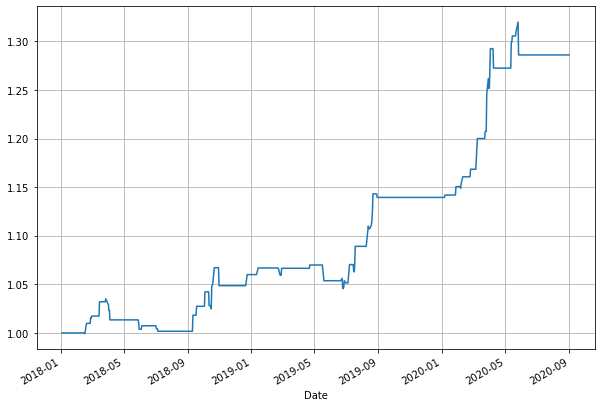

In [34]:
import matplotlib as plt
%matplotlib inline

(strategyreturns+1).cumprod().plot(figsize=(10,7),grid=True)


C:\Users\ravi\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(
C:\Users\ravi\anaconda3\lib\site-packages\empyrical\stats.py:1525: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Start date,2018-01-02
End date,2020-09-01
Total months,31
,Backtest
Annual return,10.2%
Cumulative returns,28.6%
Annual volatility,5.9%
Sharpe ratio,1.67
Calmar ratio,3.16
Stability,0.88
Max drawdown,-3.2%


C:\Users\ravi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ravi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ravi\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ravi\

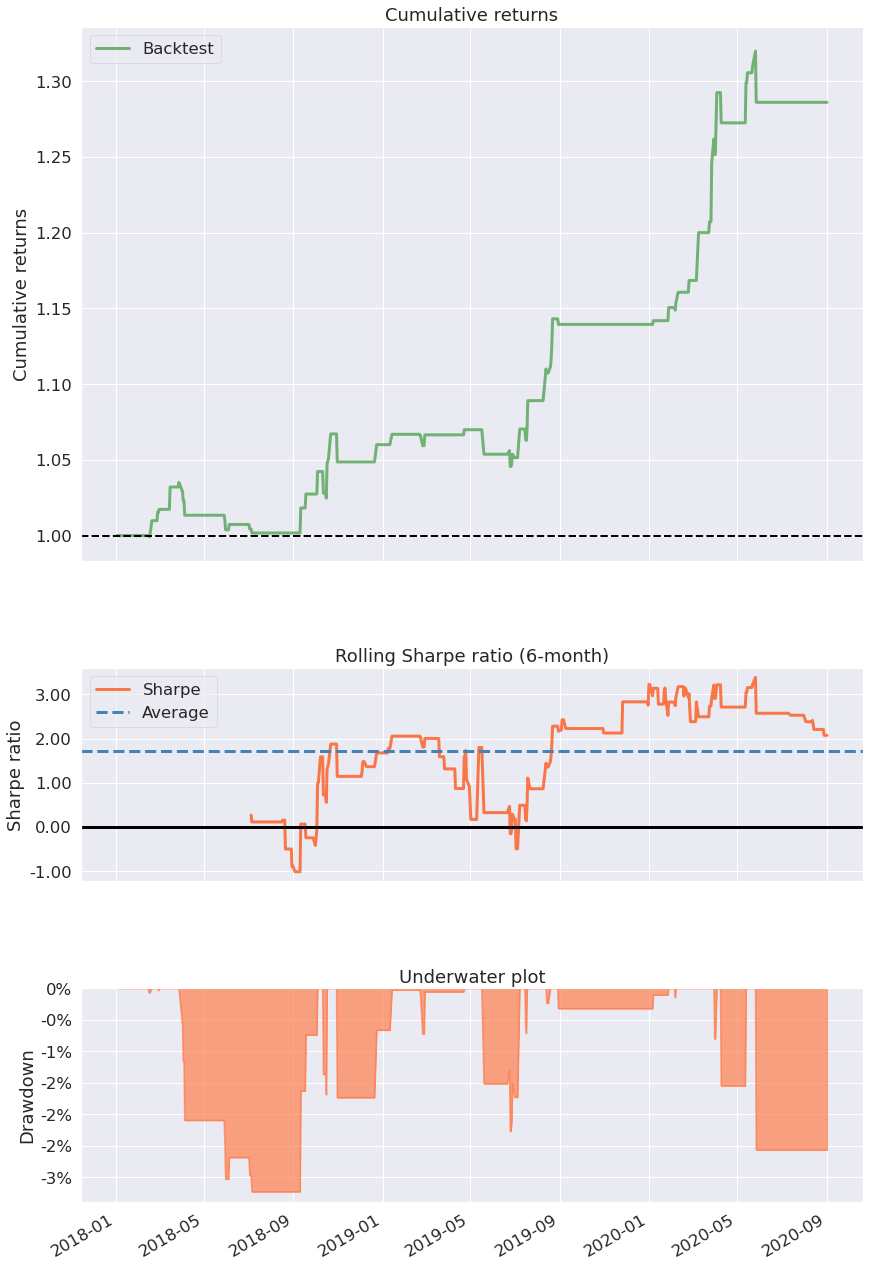

In [35]:
import pyfolio as pf
pf.create_simple_tear_sheet(strategyreturns)